# Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective
In this challenge we try to predict whether a person aboard the Titanic would survive or not, based upon certain chareacteristics.

## Skills :
<ol>
<li> Basic Plotting Techniques in Seaborn </li>
<li> Methodology of Data Exploration </li>
<li> Treating Missing Data </li>
</ol>

### Machine Learning Algorithm :
<ul>
<li> Binary Classification/Logistic Regression </li>
</ul>

#  Code and Analysis Begins

First we put in all the required imports for the basic python libraries which are needed.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

Now we import our machine learning model for logistic regression from the scikit-learn library in python.

In [9]:
from sklearn.linear_model import LogisticRegression

## Getting the Data

Our data is saved in two files in the csv format:-
<ol>
<li> train.csv : This file contains the data for training our model </li>
<li> test.csv : This file has the data on which we will test our model and evaluate its accuracy </li>
</ol>

<b>We now import the data into pandas dataframes using the read_csv method</b>

In [10]:
titanic_train = pd.read_csv("train.csv")

In [11]:
titanic_test = pd.read_csv("test.csv")

## Getting to know the Data

In [12]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have the following information and characteristics available for each of the passengers aboard the Titanic:-
<ol>
<li> PassengerId : Same as a serial number
<li> Survived : Classifying into 0= "not survived" and 1 = "Survived"
<li> PClass : The type of passenger class of ticket i.e. First, Second and Third
<li> Name : Name of the Passenger
<li> Sex : Gender of the Passenger
<li> Age : Age of the Passenger
<li> SibSp : Number of siblings + spouse(if any) on board
<li> Parch : Number of Parents + children (if on board)
<li> Ticket : Ticket Number
<li> Fare : The amount paid for ticket
<li> Cabin : The Cabin number of the passenger
<li> Embarked : The port from which the passenger embarked
</ol>
    

<b> Checking for missing Data </b>

First and foremost, we check our dataset for null values i.e. missing data. We make a heatmap of our dataframe with Nan Values marked as False.

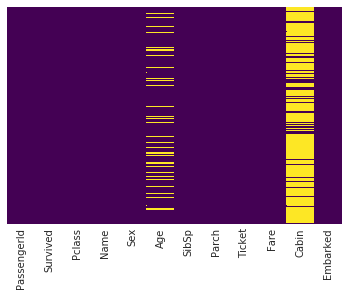

In [19]:
sns.heatmap(data=titanic_train.isnull(),cmap="viridis",cbar=False,yticklabels=False)

We notice that the "Age" column has some mising data which can probably be interpolated from the age data of the other passengers. However, the "Cabin" column has so much missing data that it is better to drop the column.

<b>It is important to keep in mind to do all data manipulations to both the training and the test data.</b>


In [ ]:
titanic_train.drop("Cabin",inplace=True,axis=1)
titanic_test.drop("Cabin", inplace=True,axis=1)

We plot the distribution of the age of the passengers grouped by the Passenger class and note that there is variation in the mean age among the different classes

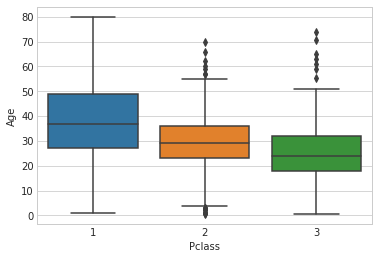

In [37]:
sns.boxplot(data=titanic_train,x='Pclass',y='Age')


Now we plot the distribution of the age grouped according to the sex of the passengers and note that there is not much variation in the mean age.

<b> Therefore, it will be appropriate to fill in the missing values in the age column according to the mean age of the passenger class. </b>

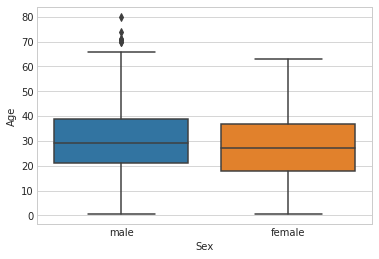

In [36]:
sns.boxplot(data=titanic_train,x='Sex',y='Age')

In [158]:
groupby_age = titanic_train.groupby(by="Pclass").mean()["Age"]
def interpolate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return groupby_age[1]
        elif Pclass == 2:
            return groupby_age[2]
        else:
            return groupby_age[3]
    else:
        return Age

In [160]:
titanic_train["Age"] = titanic_train[["Age","Pclass"]].apply(interpolate_age, axis=1)
titanic_test["Age"] = titanic_train[["Age","Pclass"]].apply(interpolate_age, axis=1)

We now check the dataset again for missing data.

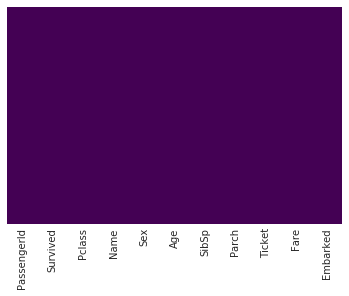

In [163]:
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

We need only numerical values for our logistic regression model to work. We notice that there are 4 columns with non numnerical values.
Out of these the "Embarked" and the "Sex" column can easily be converted into categorical numberical variables.

As of now we are using a simple logistic regression model therefore we drop the "Name" and "Ticket" column

<b>Note : We can make use of text information using advanced techniques such as parsing and Natural Language Processing.

In [165]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [167]:
titanic_train.drop(["Ticket", "Name"], axis=1, inplace=True)
titanic_test.drop(["Ticket", "Name"], axis=1, inplace=True)

In [ ]:
# Creating the categorical variables
Sex = pd.get_dummies(titanic_train["Sex"],drop_first=True)
Embarked = pd.get_dummies(titanic_train["Embarked"],drop_first=True)

# Dropping the current variables from the dataset
titanic_train.drop(["Sex", "Embarked"], inplace = True, axis=1)

In [178]:
# Merging the new variables 

titanic_train = pd.concat([titanic_train, Sex, Embarked], axis=1)

Now our data is in numerical form for further visual analysis.

In [180]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


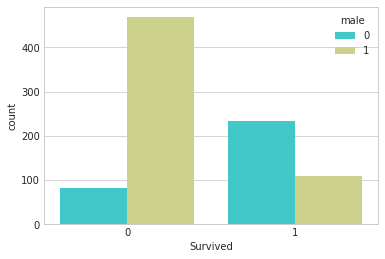

In [191]:
sns.countplot(x="Survived",hue="male", data=titanic_train, palette="rainbow")